In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.4 MB/s eta 0:00:00


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [ ]:
youtube_video = "https://www.youtube.com/watch?v=qz0aGYrrlhU"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'qz0aGYrrlhU'

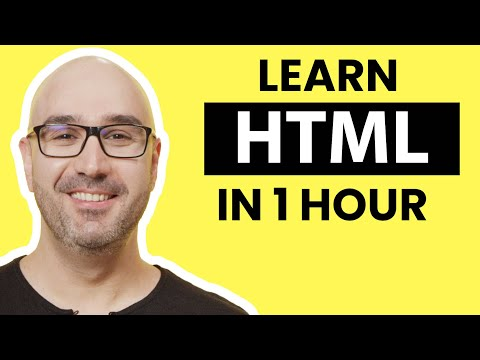

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [ ]:
transcript[0:5]

[{'text': 'welcome to the first part of the',
  'start': 4.64,
  'duration': 3.919},
 {'text': 'ultimate html and css series in this',
  'start': 5.92,
  'duration': 4.08},
 {'text': "series i'm going to take you on a",
  'start': 8.559,
  'duration': 3.361},
 {'text': 'journey and teach you all the skills you',
  'start': 10.0,
  'duration': 3.84},
 {'text': 'need to build fast and beautiful', 'start': 11.92, 'duration': 4.0}]

In [ ]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

61324


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 welcome to the first part of the ultimate html and css series in this series i'm going to take you on a journey and teach you all the skills you need to build fast and beautiful websites that look great on all kinds of devices i'm assuming you know nothing about html or css i want to learn everything from scratch so in the first part of this series we're going to talk about the fundamentals of web development with html and css in the second part we'll explore the advanced concepts and in the third part we'll put everything together and build a beautiful responsive and blazingly fast website for an imaginary cloud hosting company called mashify if you want to play with this website just head over to mashify.com and see it for yourself this is what you're going to build in this series i'm ash hamadani and i've taught millions of people how to code or how to become professional software engineers through my coding school and youtube channel if you're new here be sure to subsc

Your max_length is set to 142, but your input_length is only 68. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


Summarized text
 This video is the first hour of my ultimate html and css series . After you watch this video if you want to learn more from me you can enroll in the full course which is about 13 hours long and covers everything you need to know to build professional quali quali .
input text 
ty websites with html and css it also includes summary notes exercises a real project a certificate of accomplish and you can add your resume and a 30 day money back guarantee to get a refund if you're not satisfied so you have nothing to lose and a lot to learn so if you're interested i put the link in the description box
Summarized text
 ty websites with html and css it also includes summary notes exercises a real project a certificate of accomplish and you can add your resume and a 30 day money back guarantee to get a refund if you're not satisfied . If you're interested i put the link in the description box .


In [ ]:
len(str(summarized_text))

20322

In [ ]:
str(summarized_text)

'[" The ultimate HTML and css series will teach you all the skills you need to build fast and beautiful websites that look great on all kinds of devices . In the first part of this series we\'re going to talk about the fundamentals of web development with   the second part we\'ll explore the advanced concepts and in the third part we will put everything together and build a beautiful responsive and blazingly fast website for an imaginary cloud hosting company .", " i\'m going to use vs code along with a few extensions for starting a web server and formatting our code . i\'m welcome to use your favorite code editor if you know what you\'re doing but otherwise head over to code.visualstudio.com and download the latest version of vs code .", " We\'re going to start our web development journey here in every section you will learn something new about web development . By the end of this course you will put all of this together to build a beautiful web page . i encourage you to use the same 